# Linear Regression Models Comparitive Study on carDekho Cleaned Dataset

---
**Author Name :** Shreyansh Padarha<br>
**Email : mailto:shreyansh.padarha@hotmail.com**

---
>## Introduction 

This notebook aims at importing the previously cleaned dataset, performing an EDA on it, and using different manual hyperparameters to create different linear regression models and comparing them. The tasks on a broader scale include:

- Import the Dataset that you created as part of the ```Data Preperation, EDA and Feature Engineering for ML Solutions``` LAB .
- Perform basic EDA on the same
- Perform Linear Regression with the SKLearn Library
- Use different variations of Linear Regression as available in statsmodels library
- Compare the results of various models

---
> # Objectives  

- To be able to import the previously cleaned dataset, inverse transform it and perform a basic EDA on it.
- To Perform Linear regression using SKLearn Library.
- To implement various linear regression models available on statsmodels.
- Comapre the results of the different models, and playing around with their hyperparameters.
- Predict the price, using the best available model, for a given user input.


---
> # Problem Statement

Comparing the different available models on sci-kit learn and statsmodels library, and analysing their implementation and reults in a nutshell

---
> # Approach / Methods 

### 1. Importing the dataset

Using pandas inbuilt method __```read_csv()```__ to import the previously transformed, ready for linear regression and cleaned dataset of Lab 1.

### 2. Inverse Transforming the dataset for EDA__

I used __```pickle```__ library to mantain byte stream through different Python sessions (Lab 1 --> Lab 3). As i saved the encoded objects as pickle in Lab 1, I loaded those same pickle files, in this .ipynb file. Then, I used sklearn's __```inverse_transform()```__ to decode the features, which were label encoded, ordinal encoded, one-hot encoded and minMax scalled. I transformed and decoded the values in a copy of the imported dataframe, called ```eda_df```.

### 3. EDA related__

- Using seaborn's  __```.heatmap()```__ along with panda's __```.corr()```__ to plot a correlation heatmap.

- Using seaborn's __```.regplot()```__ along with matplotlib's __```.subplot()```__ to plot multiple regression plots for Odometer Reading of cars.

- Using seaborn's __```.catplot()```__ along with parameter _```kind = 'box'```_ to plot a boxplot of different brands and their price.

- Using seaborn's __```.catplot()```__ along with parameter _```kind = 'bar'```_ and _```row = 'DealingType'```_  to plot three barplots (each row --> one plot), to compare the daealing type with the brands and prices

### 4. Linear Regression Using SKLearn

- Importing Sklearn libraries
- Creating a dataframe _`resutls_dataframe_sk`_ to store the different model permutations and their results. The features of the dataframe are:
    1. Library
    2. Model
    3. Features
    4. FeatureCount
    5. RandomState
    6. TestingSize 
    7. Object
    8. Accuracy_R2_Score
- Using Slicing and Multiple for loops to extract all possible feature combinations, to feed in the model's as independent variables. (There are 55 possible unique combination of features, that can be considered as independent variables)
- Creating a user defined function __```performSKLearnLR()```__, that takes in, X,y, random state and testing split as parameters, and returns the R2 accuracy score and the model object.

Then using a for loop, I iterate through an array of combinations, testing split, random states, and pass them through my user-defined function, and appending the different model combinations in my results_dataframe_sk dataset. I also created a new column _```FeaturesExcluded```_, to store the features that were'nt included in the model.

### 5. Linear Regression Using statsmodels

- Importing stastsmodels.api library
- Creating a dictionary of mehtods and model name
- Iterating through the dictionary and possible combinations array created earlier, to generate different linear regression models. Appending those models and their accuracy scores to _```results_dataframe_sm```_ dataframe.

### 6. Comparing SKLearn vs OLS Results

- Merging statsmodels, sk-learn model results dataset using __```pd.concat()```__, while dropping additional hyperparameters of sklearn dataframe like _Testing Sixe_, _Random State_.

### 7. Predicting the car price based on 'user input'

- For predicting the price based on user input I Created user-defined functions to encode the variables again and feed back to the model.


- The model i selected for predictions, considered all the features, had a training testing split of 70:30, and the random state as 0.

---
> # Observations 

### 1. EDA

- Price (Target Variable), does'nt have a strong positive or negative correlation with any feature. But it is heavily dependednt (positive correlation) on Age of the car. It also has weak negative correlation with Distance, Fuel Type and Number of owners.
- It can be observed that the Age of the Car and Number of Owners have a Positive relationship with the distance travelled by the car. This supports logical reasoning that, as the car gets older and the more number owners it goes through, the more distance the car travels. Similarly, it can be observed that as the car travels longer, the price listing decreases. It again supports basic understanding that due to depreciation, wear & tear through distance travelled, the listed price of the car also decreases.
- It can be seen that Audi has the Costliest car, followed by Mercedes-Benz.
- BMW, Mercedes-Benz, Volvo, Landrover and Jaguar's cars are pricier than their competitors, which makes sense as these company has a lineup of luxury sedans, luxury SUVs, CSUVs.
- Barring a few companies, almost all have many outliers in theri price listing. This shows that prices of cars are not as much brand dependent as they are on other factors.
- KIA and MG have one of the least number of listings on this webscrapped dataset. This might be because, KIA and MG are relatively new entrants in the Indian market, and people might have just bought the cars.
- Trustmark Broker is only reserved for Ford, Mahindra, Toyota, Hyundai, Maruti, Honda and Renault. These brands generally target the average consumer / mass.
- Direct Owner, covers almost all different brands and also different vantage points.

### 2. Linear Regression Using SKLearn

- __Highest Accuracy Score (SKLearn):__ 0.4928
    + _Feature Count:_ 9
    + _Features not considered:_ 'Automatic'
    + _Random Stae:_ 0
    + _Training Testing Split:_ 70:30


- __Total Models Simulated (SKLearn):__  1540
    + _Models with Negative Accuracy (R2 Scores):_  5
    + _Models with Accuracy>0.1 (R2 Scores):_ 1174
    + _Models with Accuracy>0.2 (R2 Scores):_ 836
    + _Models with Accuracy>0.3 (R2 Scores):_ 307
    + _Models with Accuracy>0.4 (R2 Scores):_ 136  
  
  
- The top 10 highest accuracy models, all have a random state of either __0 or 10__. Their feature counts range from __8 to 10__. The testing sizes of the top 10 models are varied in nature, but mostly __80:20__, __70:30__ or the rare __60:40__.
- Out of the top 10 highest accuracy models, __7__ have excluded either __'Brand', 'Automatic' or 'Brand'__ and 'Automatic' as a feature to be considered.

- It is observed that the feature count __9__ has the highest average accuracy score, followed by __10 and 8__. The worst performing feature count is __4__.
- When the Random State is set to __0 or 10__, the models have better accuracy. Other than that, all the random states give relatively similar accuracy score.
- It can be understood that test size, doesn't have a significant impact on the accuracy of the model. All models hav similar accuracy at varied test sizes, although __70:30__ and __80:20__, seems to be the most optimum split
- It can be observed that excluding the following feature/s, has a __positive impact__ on the accuracy of the model:_
    - Brand
    - Brand, Automatic
    - Automatic   
- It can also be deduced that the ```Age of the car``` and the ```odometer``` have a major impact on the accuracy of the model, and must be included as variables while training the model.


### 3. Linear Regression Using statsmodels

- __Highest Accuracy Score (statsmodels):__ 0.456451
    + _Feature Count:_ 10
    + _Features not considered:_ None
    + _Random Stae:_ NA
    + _Testing Training Split:_ NA


- __Total Models Simulated (statsmodels):__  220
    + _Models with Negative Accuracy (R2 Scores):_  0
    + _Models with Accuracy>0.1 (R2 Scores):_ 168
    + _Models with Accuracy>0.2 (R2 Scores):_ 116
    + _Models with Accuracy>0.3 (R2 Scores):_ 53
    + _Models with Accuracy>0.4 (R2 Scores):_ 24

    
- The top 10 highest accuracy models, have features considered count ranging from __8 to 10__. The feature that is generally excluded in the 10 best models are __Automatic__.
   
- Similar to SKLearn library, the statsmodels lr models, also indicate that the optimum feature count range from __8 to 10__. In _OLS, GLS, WLS,_ the feature count and the accuracy score have ___positive progressive relationship__.

- _GLS,WLS,OLS,GlSAR_ all give the exact same accuracy score for the varying data and models.

- Compared to SKLearn the features excluded in statsmodels LR, dont impact the accuracy score as much. But still similar to SKLEarn when 'Brand', 'Brand, Automatic' and 'Automatic' are excluded from the features for modelling, the accuracy is higher.

### 4. Comparing Models of sci-kit learn and statsmodels library

- It can be seen that across the various model permuattions of both the libraries, statsmodels has a slightly better average accuracy in the models it generates. But, as there is _customisability in test splits and random state in sci-kit learn library_, __the top 10 highest accuracy models are all generated throught sci-kit simple linear regression.__

- All the models generated with an accuracy over 0.46 belong to sci-kit learn.
- Highest Accuracy:
    1. sci-kit learn: 0.49 (features considered = 9)
    2. statsmodels: 0.46 (features considered = 10)
 
This discrepency can be pinned down to two things, sci-kit learns's more offerings when it comes to ```hypertuning parameters```, and the fact that we weren't able to try other LR models provided by statsmodels library.

There is a linear relationship between the features considered and the accuracy of the models, irrespective of the library used. statsmodels data points, are more proportional, while sc-kit learn has more scattered data points. This is because, external factors like testing_size and random_state also affected the R2 score in sci-kit learn models.


---
> # Results 

The price of the car is heavily dependent on the age of the car and has weak negative correlation with distance, fuel type and number of owners. Audi has the costliest car, followed by Mercedes-Benz, and BMW, Mercedes-Benz, Volvo, Landrover, and Jaguar's cars are pricier than their competitors. KIA and MG have one of the least number of listings on this web-scrapped dataset. Trustmark Broker is only reserved for Ford, Mahindra, Toyota, Hyundai, Maruti, Honda and Renault, while Direct Owner covers almost all different brands and also different vantage points.


The highest accuracy score achieved in linear regression using the SKLearn library is 0.4928 with nine features and excluding the 'Automatic' feature. The optimum feature count for the SKLearn library ranges from 8 to 10, and the most critical features are age of the car and odometer.
The highest accuracy score achieved in linear regression using the statsmodels library is 0.456451 with ten features and none excluded. The optimum feature count for the statsmodels library ranges from 8 to 10, and the feature that is generally excluded is 'Automatic.'

__Comparing the libraries and their models (specific to this dataset)__

Comparing the performance of the two linear regression models, it can be observed that the SKLearn model generally performs better than the statsmodels model in terms of accuracy, with the highest accuracy score of 0.4928, while the highest accuracy score of the statsmodels model is 0.4565.
However, the statsmodels model has the advantage of providing more detailed statistical information, such as p-values and t-statistics, which can be used to assess the significance of individual features in the model.

---

> # Learnings

This lab program, made me realise that there are a vast variety of linear regression models that are out there, out of which, a data scientist, ml engineer or statistician needs to understand which model, and which hyperparameters are supossed to be selected and fine-tuned to give the desired accuracy and result.

From a coding POV, I made use of as many user-defined functions as I could, and it was fun to render so many different permutations of LR models in such short amount of time.

---
> # References

1. Sklearn Documentation: https://scikit-learn.org/stable/
2. statmsodel Documentation: https://www.statsmodels.org/stable/index.html
3. Matplot Library Documnentaion: https://matplotlib.org/
4. GeeksForGeeks: https://www.geeksforgeeks.org/ 
5. StackOverflow: https://stackoverflow.com/ 
6. Seaborn Documentation: https://seaborn.pydata.org/api.html#objects-api

---
> # Completion Status:

| Question | Status |
| --- | --- |
| __Objective 1__ (Importing the dataset) | __Completed__ |
| __Objective 2__ (Performing a basic EDA) | __Completed__ |
| __Objective 3__ (Linear Regression with SKLearn Library)| __Completed__ |
| __Objective 4__ (Linear Regression"s" with statsmodel Library)| __Completed__ |
| __Objective 5__ (Comparing LR Model Results) | __Completed__ |

---

### Importing Required Libraries

In [1]:
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd
import pickle

#Disabling warnings
import warnings
warnings.filterwarnings("ignore")

# importing the transformed/cleanded dataset from 'lab 1'

In [2]:
#importing the dataset using read_csv method
df = pd.read_csv("cleaned_dataset.csv")

In [3]:
df.head(5)

,Brand,AgeOfCar,OdoMeterReading,FuelType,NoOfOwners,Broker,Direct Owner,Trustmark Broker,Manual,Automatic,Price
0,8,8,1.766863,1,0.0,1.0,0.0,0.0,0.0,1.0,4.954944
1,17,11,1.689245,1,0.0,0.0,1.0,0.0,0.0,1.0,5.686937
2,25,9,0.724381,1,0.0,0.0,1.0,0.0,0.0,1.0,2.027027
3,26,13,0.295553,4,4.0,0.0,1.0,0.0,1.0,0.0,3.716216
4,25,12,1.153209,1,0.0,0.0,1.0,0.0,0.0,1.0,1.801802


---
__Method:__

Using pandas inbuilt method __```read_csv()```__ to import the previously transformed, ready for linear regression and cleaned dataset of Lab 1.

---

# EDA

In [4]:
#Creating a copy of the transformed dataset, that will be further inverse transformed for EDA
eda_df = df.copy()

### Data Transformation: Inverse Transforming the dataset for EDA [Using Pickle files]

In [5]:
#Loading back the pickle files 
ss_odometer = pickle.load(open("pickled_files/standard_scaler_odoMeter.pickle", "rb"))
ore_owners = pickle.load(open("pickled_files/ordinal_encoder_owners.pickle", "rb"))
ohe_gear_sys = pickle.load(open("pickled_files/onehot_encoder_gearSystem.pickle", "rb"))
ohe_dealing_type = pickle.load(open("pickled_files/onehot_encoder_dealingType.pickle", "rb"))
mmx_price = pickle.load(open("pickled_files/minMax_scaler_price.pickle", "rb"))
le_fuel = pickle.load(open("pickled_files/lable_encoder_fuel.pickle", "rb"))
le_brand = pickle.load(open("pickled_files/lable_encoder_brands.pickle", "rb"))

In [129]:
#Creating Key-Value paired dictionaries to store the columns with corresponding transformation objects
#MinMax Scalled, Label Encoded, Ordinal Encoded Variables
mapping_dict = {
    'Brand' : le_brand, 
    'OdoMeterReading' : ss_odometer, 
    'FuelType' : le_fuel, 
    'NoOfOwners' : ore_owners,
    'Price' : mmx_price,
}

#One hot encoded variables
mapping_ohe_dict = {
    'GearSystem' : ohe_gear_sys,
    'DealingType' : ohe_dealing_type, 
}

In [7]:
# User-Defined function to Inverse transoform the features through the pickled variables

#For MinMax Scalled, Label Encoded, Ordinal Encoded Variables
def inverse_transform(df,mapped_dict):
    for x in mapped_dict:
        df[x] = mapped_dict[x].inverse_transform(df[[x]])
        
#For One Hot Encoded Variables
def invverse_transform_ohe(df,obj,new_col,cols):
    df[new_col] = obj.inverse_transform(df[cols])
    df.drop(cols, axis=1,inplace=True)

In [8]:
#Creating an array to store the old column names of One-Hot Encoded Variables
broker_colname_arr = ['Broker', 'Direct Owner', 'Trustmark Broker']
gearsys_colname_arr = ['Manual', 'Automatic']

#Inverse transforming one-hot encoded features
invverse_transform_ohe(eda_df,ohe_dealing_type,'DealingType',broker_colname_arr)
invverse_transform_ohe(eda_df,ohe_gear_sys,'GearSystem',gearsys_colname_arr)

#Inverse transforming other features
inverse_transform(eda_df,mapping_dict)

In [9]:
#Checking the inverse transformed dataset
eda_df.head(5)

,Brand,AgeOfCar,OdoMeterReading,FuelType,NoOfOwners,Price,DealingType,GearSystem
0,Ford,8,152620.0,Diesel,0.0,574998.75,Broker,Manual
1,Mahindra,11,149000.0,Diesel,0.0,656250.00,Direct Owner,Manual
2,Tata,9,104000.0,Diesel,0.0,250000.00,Direct Owner,Manual
3,Toyota,13,84000.0,Petrol,4.0,437500.00,Direct Owner,Automatic
4,Tata,12,124000.0,Diesel,0.0,225000.00,Direct Owner,Manual


---
__Method:__

I used __```pickle```__ library to mantain byte stream through different Python sessions (Lab 1 --> Lab 3). As i saved the encoded objects as pickle in Lab 1, I loaded those same pickle files, in this .ipynb file. Then, I used sklearn's __```inverse_transform()```__ to decode the features, which were label encoded, ordinal encoded, one-hot encoded and minMax scalled. I transformed and decoded the values in a copy of the imported dataframe, called ```eda_df```.

---

### EDA: Correlation between the features (Heatmap)

<AxesSubplot:>

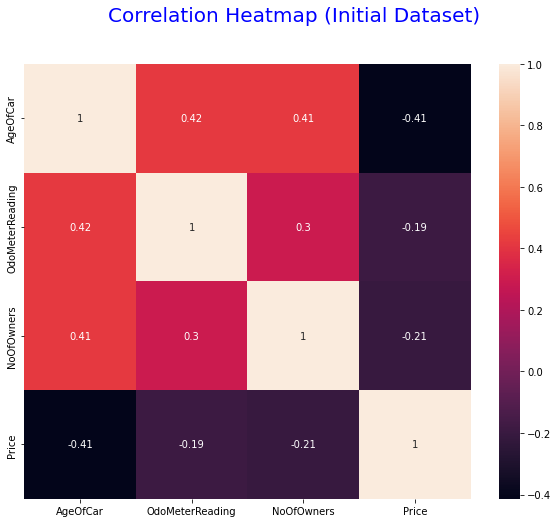

In [10]:
#Plotting a correlation heatmap, using seaborn library
plt.figure(figsize = (10,8))
plt.suptitle("Correlation Heatmap (Initial Dataset)",fontsize=20, c='b')
sns.heatmap(eda_df.corr(),annot=True)

<AxesSubplot:>

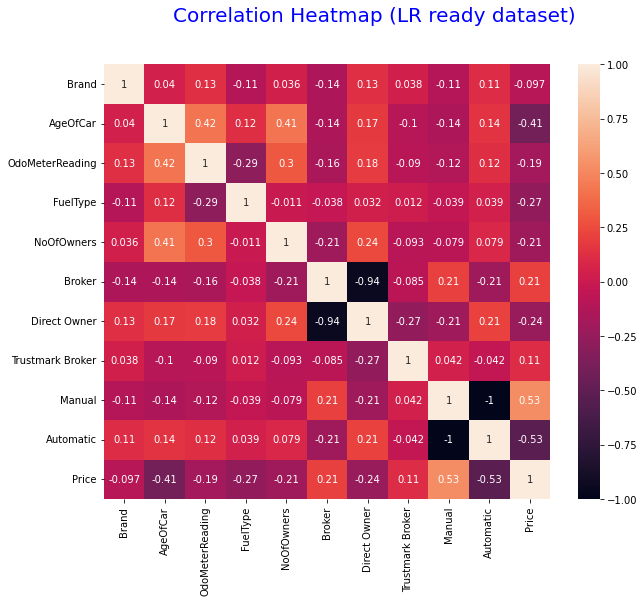

In [11]:
#Plotting a correlation heatmap, using seaborn library
plt.figure(figsize = (10,8))
plt.suptitle("Correlation Heatmap (LR ready dataset)",fontsize=20, c='b')
sns.heatmap(df.corr(),annot=True)

---
__Method:__

Using seaborn's  __```.heatmap()```__ along with panda's __```.corr()```__ to plot a correlation heatmap.

__Observation:__

Price (Target Variable), does'nt have a strong positive or negative correlation with any feature. But it is heavily dependednt (positive correlation) on Age of the car. It also has weak negative correlation with Distance, Fuel Type and Number of owners.

---

### EDA: Understanding the relationship between the Distance a car has travelled and other features (Regplot)

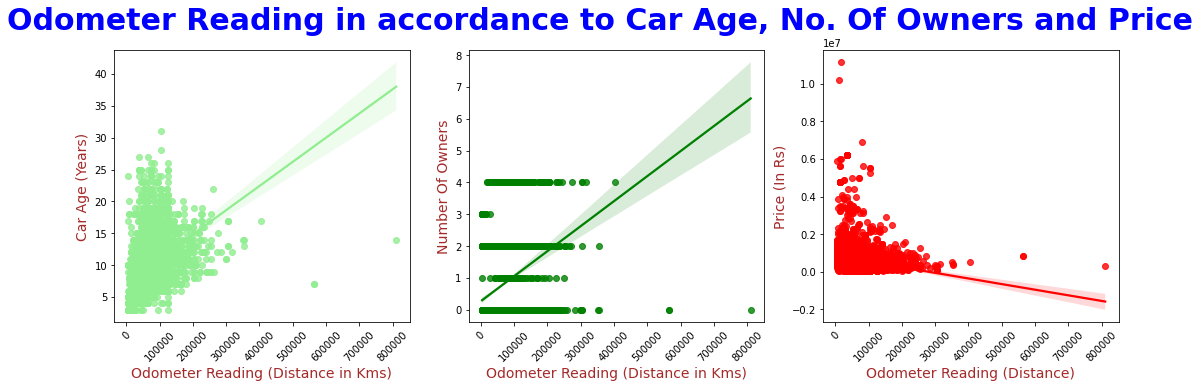

In [12]:
#Plotting multiple reg plots for OdoMeter reading
plt.figure(figsize = (18,6))
spacing = 0.250
plt.suptitle("Odometer Reading in accordance to Car Age, No. Of Owners and Price",fontsize=30, c='b'
            , weight='bold')

#Plot 1
plt.subplot(1,3,1)
sns.regplot(data = eda_df, 
           y = 'AgeOfCar',
           x = 'OdoMeterReading',color= 'lightgreen')

plt.subplots_adjust(bottom=spacing)
plt.xticks(rotation=45)

plt.xlabel("Odometer Reading (Distance in Kms)",c='brown',fontsize=14)
plt.ylabel("Car Age (Years)",c='brown',fontsize=14)

#Plot 2
plt.subplot(1,3,2)
sns.regplot(data = eda_df, 
           x = 'OdoMeterReading',
           y = 'NoOfOwners', color= 'green')

plt.subplots_adjust(bottom=spacing)
plt.xticks(rotation=45)

plt.xlabel("Odometer Reading (Distance in Kms)",c='brown',fontsize=14)
plt.ylabel("Number Of Owners",c='brown',fontsize=14)

#Plot 3
plt.subplot(1,3,3)
sns.regplot(data = eda_df, 
           x = 'OdoMeterReading',
           y = 'Price',color='red')

plt.subplots_adjust(bottom=spacing)
plt.xticks(rotation=45)

plt.xlabel("Odometer Reading (Distance)",c='brown',fontsize=14)
plt.ylabel("Price (In Rs)",c='brown',fontsize=14)
#Plot All
plt.show()

---
__Method:__

Using seaborn's __```.regplot()```__ along with matplotlib's __```.subplot()```__ to plot multiple regression plots for Odometer Reading of cars.


__Observation:__

It can be observed that the Age of the Car and Number of Owners have a Positive relationship with the distance travelled by the car. This supports logical reasoning that, as the car gets older and the more number owners it goes through, the more distance the car travels. Similarly, it can be observed that as the car travels longer, the price listing decreases. It again supports basic understanding that due to depreciation, wear & tear through distance travelled, the listed price of the car also decreases.

---

### EDA: Various price points of different Brands (Cat Plot)

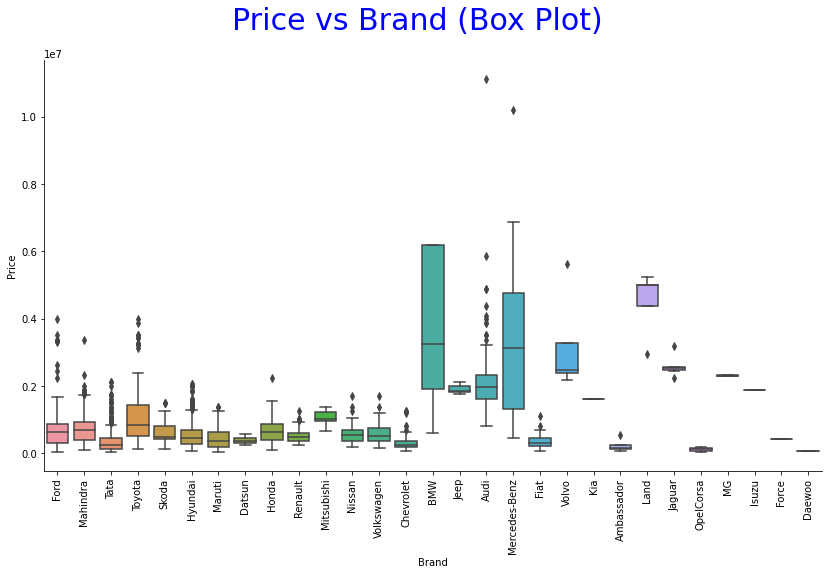

In [13]:
#Using Catplot (boxplot) to compare various brands and their price listing
x = sns.catplot(data = eda_df,
           kind = 'box',
           x = 'Brand',
           y = 'Price',
           height=8.27, 
            aspect=11.7/8.27)

x.fig.suptitle('Price vs Brand (Box Plot)',
               fontsize=30, c='b')

plt.subplots_adjust(bottom=0.2)
x.fig.subplots_adjust(top=0.89)
plt.xticks(rotation=90)
plt.show()

---
__Method:__

Using seaborn's __```.catplot()```__ along with parameter _```kind = 'box'```_ to plot a boxplot of different brands and their price.


__Observation:__

- It can be seen that Audi has the Costliest car, followed by Mercedes-Benz.
- BMW, Mercedes-Benz, Volvo, Landrover and Jaguar's cars are pricier than their competitors, which makes sense as these company has a lineup of luxury sedans, luxury SUVs, CSUVs.
- Barring a few companies, almost all have many outliers in theri price listing. This shows that prices of cars are not as much brand dependent as they are on other factors.
- KIA and MG have one of the least number of listings on this webscrapped dataset. This might be because, KIA and MG are relatively new entrants in the Indian market, and people might have just bought the cars.

---

### EDA: Analysing Dealing Type in accordance to Price & Brands (Cat Plot)

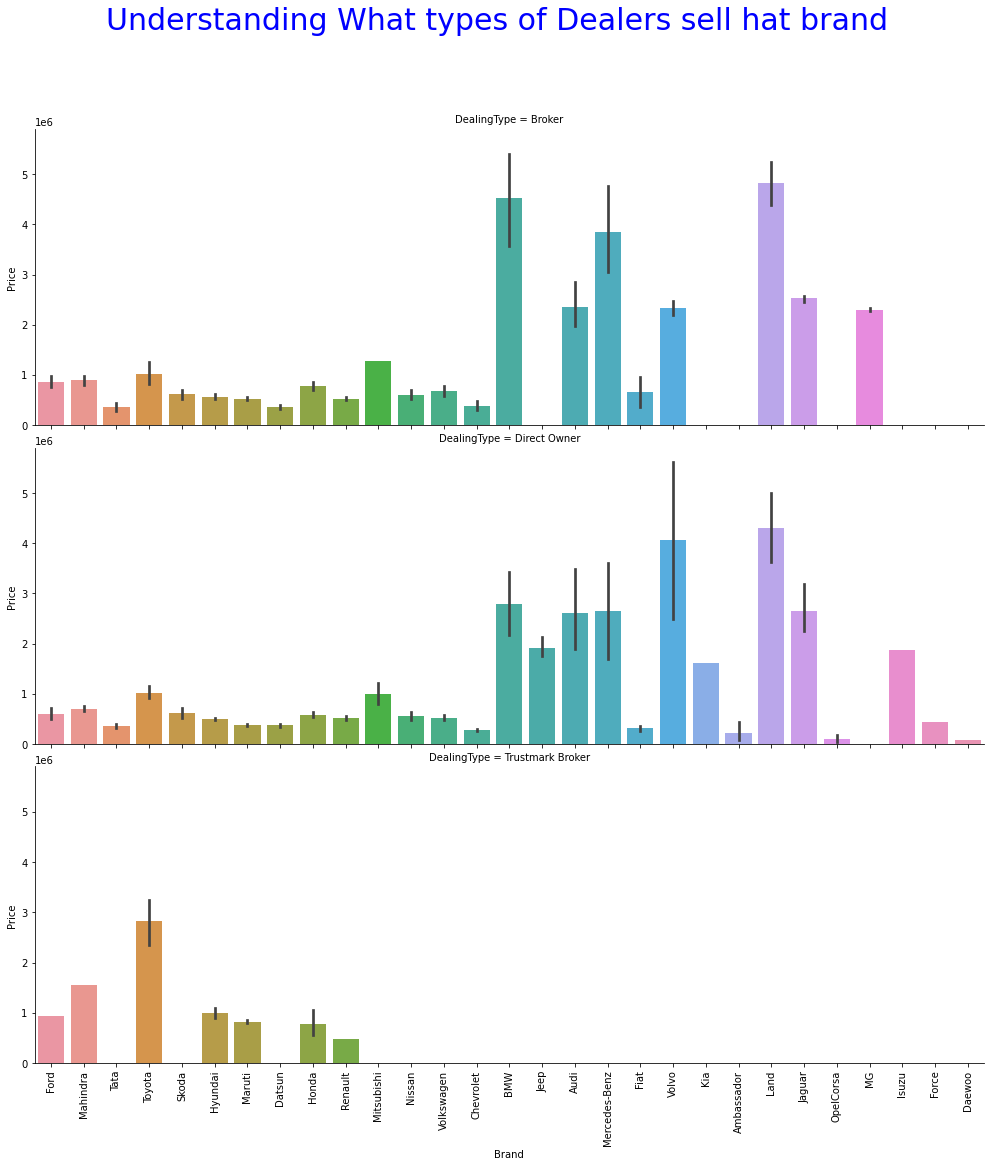

In [14]:
#Plotting a catplot to analyse the realationsship of type of dealer with brands and prices
x = sns.catplot(data = eda_df,
           kind = 'bar',
           x = 'Brand',
           y = 'Price',
            row = 'DealingType',
           height=6.27, 
            aspect=11.7/5.27)


x.fig.suptitle('Understanding What types of Dealers sell what brand',
               fontsize=30, c='b')

plt.subplots_adjust(bottom=0.2)
x.fig.subplots_adjust(top=0.89)

plt.xticks(rotation=90)
plt.show()


---
__Method:__

Using seaborn's __```.catplot()```__ along with parameter _```kind = 'bar'```_ and _```row = 'DealingType'```_  to plot three barplots (each row --> one plot), to compare the daealing type with the brands and prices

__Observation:__

- Trustmark Broker is only reserved for Ford, Mahindra, Toyota, Hyundai, Maruti, Honda and Renault. These brands generally target the average consumer / mass.
- Direct Owner, covers almost all different brands and also different vantage points.

---

# Linear Regression Using SKLearn

__Importing Required Libraries__

In [15]:
#sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

### Model Results Dataset

In [16]:
#Creating a dataframe that will store all LR Model Results
results_dataframe_sk = pd.DataFrame (columns = ["Library","Model","Features","FeatureCount",
                                            "RandomState","TestingSize",
                                            "Object","Accuracy_R2_Score"])

In [17]:
### Feature Combinations for model building
#Extracting all possible feature combinations for the LR models
features = list(df.columns)
features.remove("Price")
combinations = []
ft_excluded = []
for value in range(0,len(features)):
    ft = features[value:]
    for i in range(1,len(ft)+1):
        combinations.append(ft[:i])

In [18]:
print("Total Unique Combination of Features : ", len(combinations))

Total Unique Combination of Features :  55


In [19]:
def performSKlearnLR(X,y,random_state,t_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state,
                                                       test_size = t_size)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = r2_score(y_test, y_pred)
    return model, acc

In [20]:
#Running Different permutations of LR models
testing_size_arr = [0.2,0.30,0.40,0.5]
random_states_arr = [0,10,20,30,40,42,50]

for t_size in testing_size_arr:
    for rand_state in random_states_arr:
        for ftr_considered in combinations:
            X = df[ftr_considered]
            y = df['Price']
            model, accuray_score = performSKlearnLR(X,y,rand_state,t_size)
            
            result = {}
            result ['Library'] = 'sci-kit learn'
            result ['Model'] = "Simple Linear Regression"
            result ['Features'] = ftr_considered
            result['FeatureCount'] = int(len(ftr_considered))
            result['RandomState'] = rand_state
            result['TestingSize'] = t_size
            result["Object"] = model
            result["Accuracy_R2_Score"] = accuray_score
            results_dataframe_sk = results_dataframe_sk.append(result,ignore_index = True)

In [21]:
#Adding new column, for storing the features excluded
df_ftrs_cons = list(results_dataframe_sk["Features"])
excluded = []   
for vals in df_ftrs_cons:
    excl_ele = ""
    for ft in range(0,len(features)):
        if features[ft] not in vals:
            excl_ele = excl_ele + " , "+ features[ft]
    excluded.append(excl_ele)

results_dataframe_sk.insert(4, "FeaturesExcluded", excluded, allow_duplicates=True)

In [22]:
results_dataframe_sk.sample(6)

,Library,Model,Features,FeatureCount,FeaturesExcluded,RandomState,TestingSize,Object,Accuracy_R2_Score
492,sci-kit learn,Simple Linear Regression,[Manual],1,", Brand , AgeOfCar , OdoMeterReading , FuelTy...",10,0.3,LinearRegression(),0.281169
1322,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading]",3,", FuelType , NoOfOwners , Broker , Direct Own...",30,0.5,LinearRegression(),0.169785
643,sci-kit learn,Simple Linear Regression,"[NoOfOwners, Broker, Direct Owner, Trustmark B...",5,", Brand , AgeOfCar , OdoMeterReading , FuelTy...",40,0.3,LinearRegression(),0.319418
230,sci-kit learn,Simple Linear Regression,[AgeOfCar],1,", Brand , OdoMeterReading , FuelType , NoOfOw...",40,0.2,LinearRegression(),0.155070
945,sci-kit learn,Simple Linear Regression,[AgeOfCar],1,", Brand , OdoMeterReading , FuelType , NoOfOw...",30,0.4,LinearRegression(),0.167881
1465,sci-kit learn,Simple Linear Regression,"[NoOfOwners, Broker]",2,", Brand , AgeOfCar , OdoMeterReading , FuelTy...",42,0.5,LinearRegression(),0.069111


---
__Method:__

- Importing Sklearn libraries
- Creating a dataframe _`resutls_dataframe_sk`_ to store the different model permutations and their results. The features of the dataframe are:
    1. Library
    2. Model
    3. Features
    4. FeatureCount
    5. RandomState
    6. TestingSize 
    7. Object
    8. Accuracy_R2_Score
- Using Slicing and Multiple for loops to extract all possible feature combinations, to feed in the model's as independent variables. (There are 55 possible unique combination of features, that can be considered as independent variables)
- Creating a user defined function __```performSKLearnLR()```__, that takes in, X,y, random state and testing split as parameters, and returns the R2 accuracy score and the model object.

Then using a for loop, I iterate through an array of combinations, testing split, random states, and pass them through my user-defined function, and appending the different model combinations in my results_dataframe_sk dataset. I also created a new column _```FeaturesExcluded```_, to store the features that were'nt included in the model.

---


In [23]:
results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']==results_dataframe_sk['Accuracy_R2_Score'].max()]

,Library,Model,Features,FeatureCount,FeaturesExcluded,RandomState,TestingSize,Object,Accuracy_R2_Score
393,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",0,0.3,LinearRegression(),0.4928


In [24]:
#Sorting in Descending order according to Accuracy Score
results_dataframe_sk.sort_values(by=['Accuracy_R2_Score'],ascending=False).head(10)

,Library,Model,Features,FeatureCount,FeaturesExcluded,RandomState,TestingSize,Object,Accuracy_R2_Score
393,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",0,0.3,LinearRegression(),0.492800
394,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,0,0.3,LinearRegression(),0.492800
403,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",9,", Brand",0,0.3,LinearRegression(),0.490010
402,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",8,", Brand , Automatic",0,0.3,LinearRegression(),0.490010
73,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",9,", Brand",10,0.2,LinearRegression(),0.486127
72,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",8,", Brand , Automatic",10,0.2,LinearRegression(),0.486126
63,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",10,0.2,LinearRegression(),0.486102
64,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,10,0.2,LinearRegression(),0.486102
779,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,0,0.4,LinearRegression(),0.484285
778,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",0,0.4,LinearRegression(),0.484285


In [25]:
print("Total Models Simulated: ",len(results_dataframe_sk))
print("Models with Negative Accuracy (R2 Scores): ", len(results_dataframe_sk)-len(results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']>0.0]))
print("Models with Accuracy>0.1 (R2 Scores)",len(results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']>0.1]))
print("Models with Accuracy>0.2 (R2 Scores)",len(results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']>0.2]))
print("Models with Accuracy>0.3 (R2 Scores)",len(results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']>0.3]))
print("Models with Accuracy>0.4 (R2 Scores)",len(results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']>0.4]))

Total Models Simulated:  1540
Models with Negative Accuracy (R2 Scores):  5
Models with Accuracy>0.1 (R2 Scores) 1174
Models with Accuracy>0.2 (R2 Scores) 836
Models with Accuracy>0.3 (R2 Scores) 307
Models with Accuracy>0.4 (R2 Scores) 136


---
__Observation__

- __Highest Accuracy Score (SKLearn):__ 0.4928
    + _Feature Count:_ 9
    + _Features not considered:_ 'Automatic'
    + _Random Stae:_ 0
    + _Training Testing Split:_ 70:30


- __Total Models Simulated (SKLearn):__  1540
    + _Models with Negative Accuracy (R2 Scores):_  5
    + _Models with Accuracy>0.1 (R2 Scores):_ 1174
    + _Models with Accuracy>0.2 (R2 Scores):_ 836
    + _Models with Accuracy>0.3 (R2 Scores):_ 307
    + _Models with Accuracy>0.4 (R2 Scores):_ 136

    
- __The top 10 highest accuracy models, all have a random state of either 0 or 10. Their feature counts range from 8 to 10. The testing sizes of the top 10 models are varied in nature, but mostly 20:80, 30:70 or the rare 40:60.__
    
- __Out of the top 10 highest accuracy models, 7 have excluded either 'Brand', 'Automatic' or 'Brand' and 'Automatic' as a feature to be considered__

---

In [26]:
#Creating a subset of accuracy scores, that are sensical
x_sk_df = results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']>0.2]
pos_sk_model_df = results_dataframe_sk[results_dataframe_sk['Accuracy_R2_Score']>0]

<Figure size 720x576 with 0 Axes>

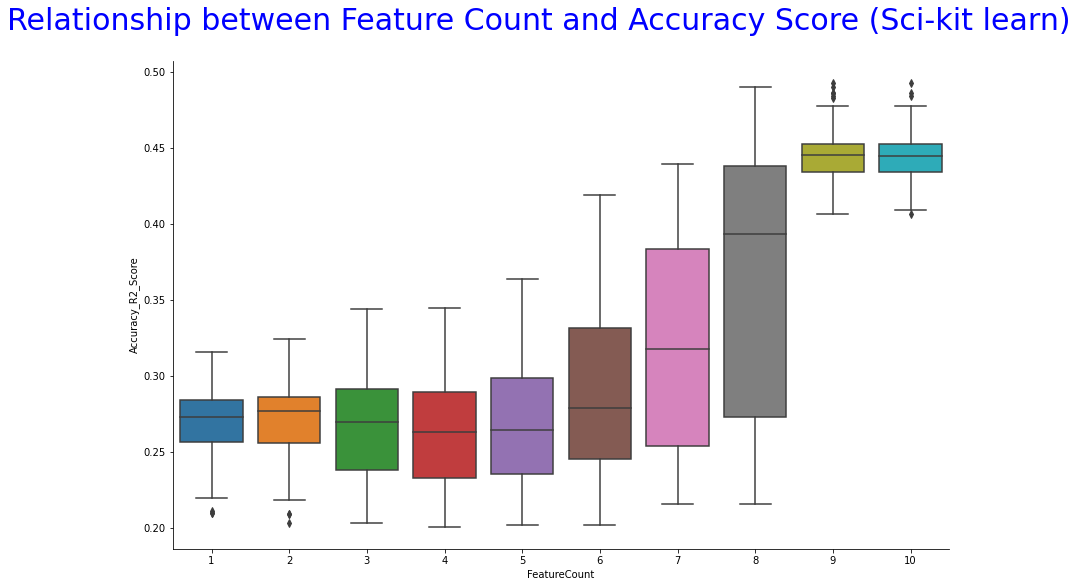

In [27]:
#Plotting the relationship between Feature Count and Accuracy Score (Sci-kit learn)
plt.figure(figsize = (10,8))
x = sns.catplot(data = x_sk_df, kind='box',
           x = 'FeatureCount',
           y = 'Accuracy_R2_Score',
           height=8.27, 
            aspect=11.7/8.27)
x.fig.suptitle('Relationship between Feature Count and Accuracy Score (Sci-kit learn)',
               fontsize=30, c='b')
x.fig.subplots_adjust(top=0.89)

---
__Observation:__

It is observed that the feature count 9 has the highest average accuracy score, followed by 10 and 8. The worst performing feature count is 4.

---

<Figure size 720x576 with 0 Axes>

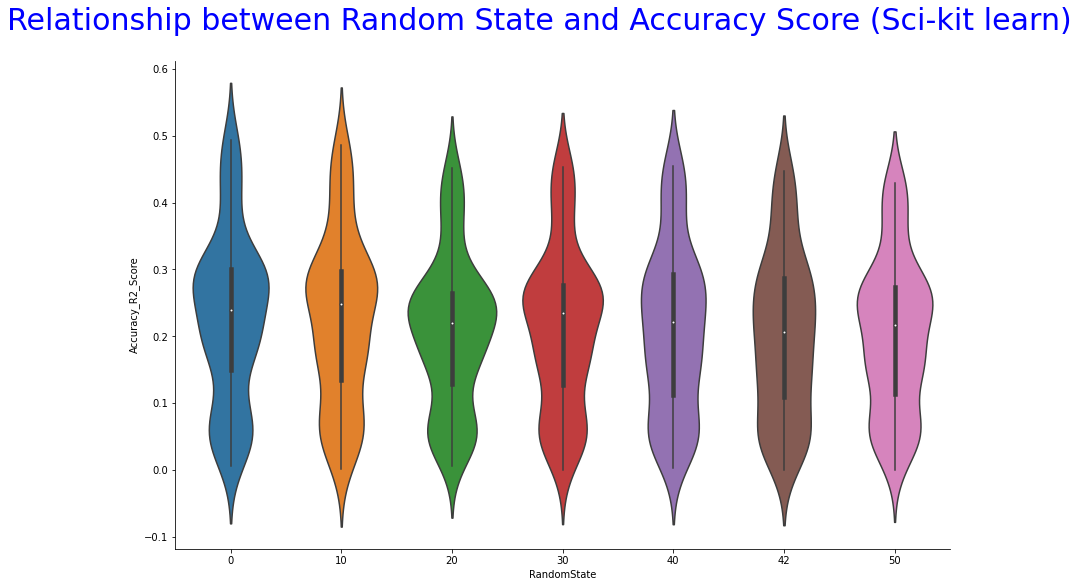

In [28]:
#Plotting the relationship between Random State and Accuracy Score (Sci-kit learn)
plt.figure(figsize = (10,8))

x = sns.catplot(data = pos_sk_model_df, kind='violin',
           x = 'RandomState',
           y = 'Accuracy_R2_Score',
           height=8.27, 
            aspect=11.7/8.27)
x.fig.suptitle('Relationship between Random State and Accuracy Score (Sci-kit learn)',
               fontsize=30, c='b')
x.fig.subplots_adjust(top=0.89)

---
__Observation:__

When the Random State is set to 0 or 10, the models have better accuracy. Other than that, all the random states give relatively similar accuracy score.

---

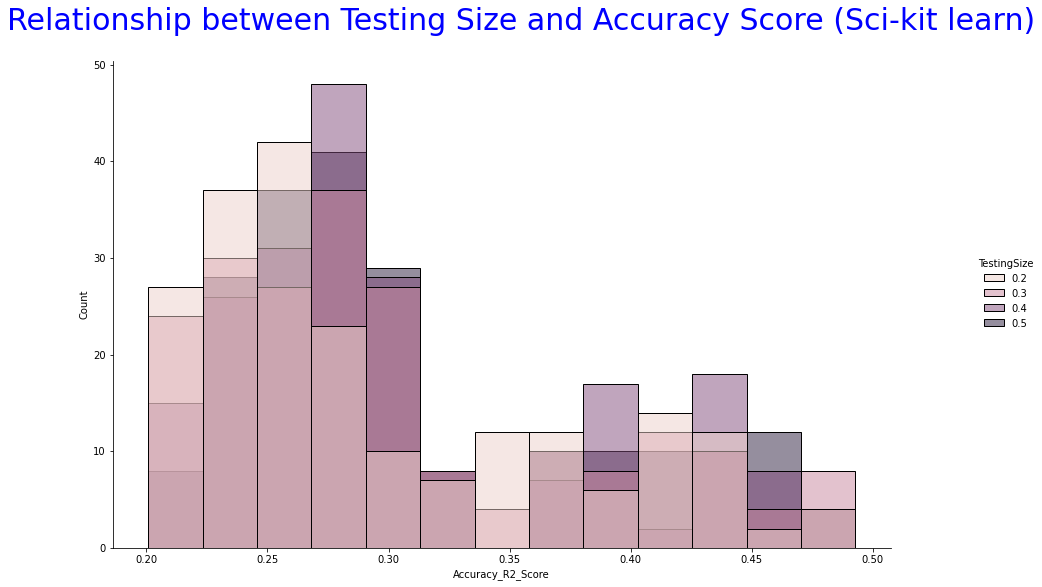

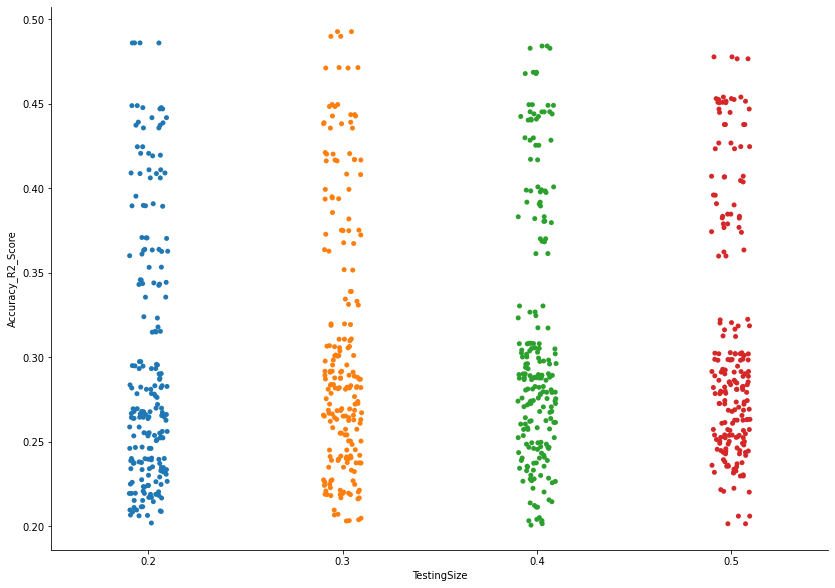

In [29]:
#Plotting the relationship between Testing Size and Accuracy Score (Sci-kit learn)
y = sns.displot(data = x_sk_df,x ='Accuracy_R2_Score',height=8.27, 
            aspect=11.7/8.27,hue='TestingSize')


x = sns.catplot(data = x_sk_df,
           x = 'TestingSize',
           y = 'Accuracy_R2_Score',
           height=8.27, 
            aspect=11.7/8.27)
y.fig.suptitle('Relationship between Testing Size and Accuracy Score (Sci-kit learn)',
               fontsize=30, c='b')
y.fig.subplots_adjust(top=0.89)

---
__Observation:__

It can be understood that test size, doesn't have a significant impact on the accuracy of the model. All models hav similar accuracy at varied test sizes, although __30:70__ and __20:80__, seems to be the most optimum split

---

<Figure size 720x576 with 0 Axes>

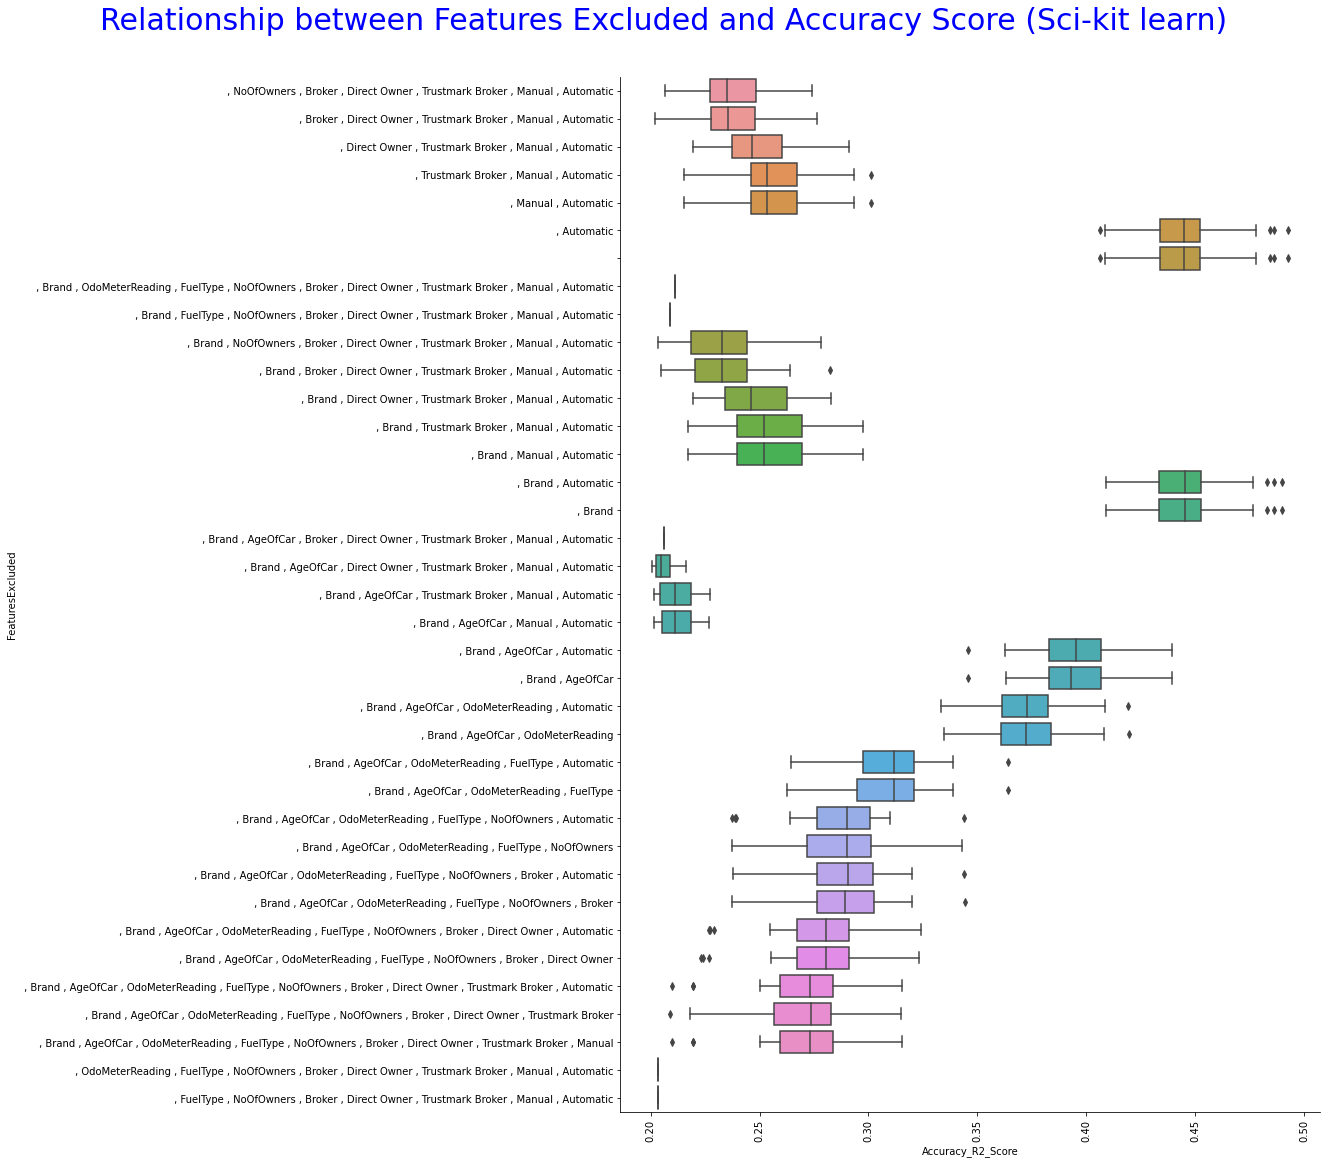

In [30]:
#Plotting the relationship between Features Excluded and Accuracy Score (Sci-kit learn)
plt.figure(figsize = (10,8))
#plt_df = x_sk_df[]
x = sns.catplot(data = x_sk_df, kind = 'box', y = 'FeaturesExcluded',x = 'Accuracy_R2_Score',
           height=16.27, 
            aspect=11.7/10.27)
x.fig.suptitle('Relationship between Features Excluded and Accuracy Score (Sci-kit learn)',
               fontsize=30, c='b')

x.fig.subplots_adjust(top=0.92)
plt.xticks(rotation=90)
plt.show()

---
__Observation:__

_It can be observed that excluding the following feature/s, has a positive impact on the accuracy of the model:_
1. Brand
2. Brand, Automatic
3. Automatic

It can also be deduced that the ```Age of the car``` and the ```odometer``` have a major impact on the accuracy of the model, and must be included as variables while training the model.

---

# Linear Regression Using statsmodels

__Importing Required Libraries__

In [31]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingWLS
from statsmodels.regression.rolling import RollingRegressionResults
from statsmodels.regression.rolling import RollingOLS
import statsmodels.formula.api as smf

from statsmodels.regression.dimred import SlicedInverseReg
from statsmodels.regression.dimred import SlicedAverageVarianceEstimation

from statsmodels.regression.dimred import PrincipalHessianDirections

### OLS (statsmodels)

In [32]:
#Checking the structure of .summary() in statsmodels
X = df[ftr_considered]
y = df['Price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1696.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          2.82e-313
Time:                        19:21:56   Log-Likelihood:                -13575.
No. Observations:                4340   AIC:                         2.715e+04
Df Residuals:                    4338   BIC:                         2.717e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6324      0.261     59.890      0.000      15.121      16.144
Automatic    -11.3523      0.276    -41.187      0.000     -11.893     -10.812
==============================================================================
Omnibus:                     3659.502   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215115.856
Skew:                           3.664   Prob(JB):                         0.00
Kurtosis:                      36.703   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### comparing statsmodels library linear regression models
1. OLS
2. GLS 
3. WLs
4. GLS

In [33]:
#Creating a dictionary of Model names and methods
lr_models = {'Ordinary Least Squares (OLS)': sm.OLS,
'Generalized Least Squares (GLS)': sm.GLS,
'Weighted Least Squares (WLS)': sm.WLS,
'Generalized Least Squares with AR covariance structure (GLSAR)': sm.GLSAR}

In [34]:
#Creating a dataframe that will store all LR Model Results
results_dataframe_sm = pd.DataFrame (columns = ["Library","Model","Features","FeatureCount",
                                            "Object","Accuracy_R2_Score"])

#Iterating through the combinations and lr models to retrieve permutations of models, and accuracies
for ftr_considered in combinations:
    for lr in lr_models:
        X = df[ftr_considered]
        y = df['Price']
        X = sm.add_constant(X)

        model = lr_models[lr](y, X).fit()
    
        predictions = model.predict(X) 
        accuracy_score = model.rsquared

        result = {}
        result ['Library'] = 'statsmodels'
        result ['Model'] = lr
        result ['Features'] = ftr_considered
        result['FeatureCount'] = int(len(ftr_considered))
        result["Object"] = model
        result["Accuracy_R2_Score"] = accuracy_score
        
        results_dataframe_sm = results_dataframe_sm.append(result,ignore_index = True)

In [35]:
#Adding new column, for storing the features excluded
df_ftrs_cons_sm = list(results_dataframe_sm["Features"])
excluded = []   
for vals in df_ftrs_cons_sm:
    excl_ele = ""
    for ft in range(0,len(features)):
        if features[ft] not in vals:
            excl_ele = excl_ele + " , "+ features[ft]
    excluded.append(excl_ele)

results_dataframe_sm.insert(4, "FeaturesExcluded", excluded, allow_duplicates=True)

In [36]:
results_dataframe_sm.sample(6)

,Library,Model,Features,FeatureCount,FeaturesExcluded,Object,Accuracy_R2_Score
77,statsmodels,Generalized Least Squares (GLS),[OdoMeterReading],1,", Brand , AgeOfCar , FuelType , NoOfOwners , ...",<statsmodels.regression.linear_model.Regressio...,0.036975
26,statsmodels,Weighted Least Squares (WLS),"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",7,", Trustmark Broker , Manual , Automatic",<statsmodels.regression.linear_model.Regressio...,0.263871
49,statsmodels,Generalized Least Squares (GLS),"[AgeOfCar, OdoMeterReading, FuelType]",3,", Brand , NoOfOwners , Broker , Direct Owner ...",<statsmodels.regression.linear_model.Regressio...,0.232805
163,statsmodels,Generalized Least Squares with AR covariance s...,[Broker],1,", Brand , AgeOfCar , OdoMeterReading , FuelTy...",<statsmodels.regression.linear_model.Regressio...,0.042117
191,statsmodels,Generalized Least Squares with AR covariance s...,"[Direct Owner, Trustmark Broker, Manual]",3,", Brand , AgeOfCar , OdoMeterReading , FuelTy...",<statsmodels.regression.linear_model.Regressio...,0.300228
203,statsmodels,Generalized Least Squares with AR covariance s...,"[Trustmark Broker, Manual]",2,", Brand , AgeOfCar , OdoMeterReading , FuelTy...",<statsmodels.regression.linear_model.Regressio...,0.288829


---
__Method:__

- Importing stastsmodels.api library
- Creating a dictionary of mehtods and model name
- Iterating through the dictionary and possible combinations array created earlier, to generate different linear regression models. Appending those models and their accuracy scores to _```results_dataframe_sm```_ dataframe.

---

In [37]:
results_dataframe_sm[results_dataframe_sm["Accuracy_R2_Score"]==results_dataframe_sm["Accuracy_R2_Score"].max()]

,Library,Model,Features,FeatureCount,FeaturesExcluded,Object,Accuracy_R2_Score
39,statsmodels,Generalized Least Squares with AR covariance s...,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,<statsmodels.regression.linear_model.Regressio...,0.456451


In [38]:
results_dataframe_sm.sort_values(by=['Accuracy_R2_Score'],ascending=False).head(10)

,Library,Model,Features,FeatureCount,FeaturesExcluded,Object,Accuracy_R2_Score
39,statsmodels,Generalized Least Squares with AR covariance s...,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,<statsmodels.regression.linear_model.Regressio...,0.456451
35,statsmodels,Generalized Least Squares with AR covariance s...,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",<statsmodels.regression.linear_model.Regressio...,0.456451
32,statsmodels,Ordinary Least Squares (OLS),"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",<statsmodels.regression.linear_model.Regressio...,0.456430
38,statsmodels,Weighted Least Squares (WLS),"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,<statsmodels.regression.linear_model.Regressio...,0.456430
36,statsmodels,Ordinary Least Squares (OLS),"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,<statsmodels.regression.linear_model.Regressio...,0.456430
34,statsmodels,Weighted Least Squares (WLS),"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",<statsmodels.regression.linear_model.Regressio...,0.456430
37,statsmodels,Generalized Least Squares (GLS),"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,<statsmodels.regression.linear_model.Regressio...,0.456430
33,statsmodels,Generalized Least Squares (GLS),"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",<statsmodels.regression.linear_model.Regressio...,0.456430
71,statsmodels,Generalized Least Squares with AR covariance s...,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",8,", Brand , Automatic",<statsmodels.regression.linear_model.Regressio...,0.454201
75,statsmodels,Generalized Least Squares with AR covariance s...,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",9,", Brand",<statsmodels.regression.linear_model.Regressio...,0.454201


In [39]:
print("Total Models Simulated: ",len(results_dataframe_sm))
print("Models with Negative Accuracy (R2 Scores): ", len(results_dataframe_sm)-len(results_dataframe_sm[results_dataframe_sm['Accuracy_R2_Score']>0.0]))
print("Models with Accuracy>0.1 (R2 Scores)",len(results_dataframe_sm[results_dataframe_sm['Accuracy_R2_Score']>0.1]))
print("Models with Accuracy>0.2 (R2 Scores)",len(results_dataframe_sm[results_dataframe_sm['Accuracy_R2_Score']>0.2]))
print("Models with Accuracy>0.3 (R2 Scores)",len(results_dataframe_sm[results_dataframe_sm['Accuracy_R2_Score']>0.3]))
print("Models with Accuracy>0.4 (R2 Scores)",len(results_dataframe_sm[results_dataframe_sm['Accuracy_R2_Score']>0.4]))

Total Models Simulated:  220
Models with Negative Accuracy (R2 Scores):  0
Models with Accuracy>0.1 (R2 Scores) 168
Models with Accuracy>0.2 (R2 Scores) 116
Models with Accuracy>0.3 (R2 Scores) 53
Models with Accuracy>0.4 (R2 Scores) 24


---
__Observation__

- __Highest Accuracy Score (statsmodels):__ 0.456451
    + _Feature Count:_ 10
    + _Features not considered:_ None
    + _Random Stae:_ NA
    + _Testing Training Split:_ NA


- __Total Models Simulated (statsmodels):__  220
    + _Models with Negative Accuracy (R2 Scores):_  0
    + _Models with Accuracy>0.1 (R2 Scores):_ 168
    + _Models with Accuracy>0.2 (R2 Scores):_ 116
    + _Models with Accuracy>0.3 (R2 Scores):_ 53
    + _Models with Accuracy>0.4 (R2 Scores):_ 24

    
- __The top 10 highest accuracy models, have features considered count ranging from 8 to 10. The feature that is generally excluded in the 10 best models are `Automatic`__
   
---

<Figure size 720x576 with 0 Axes>

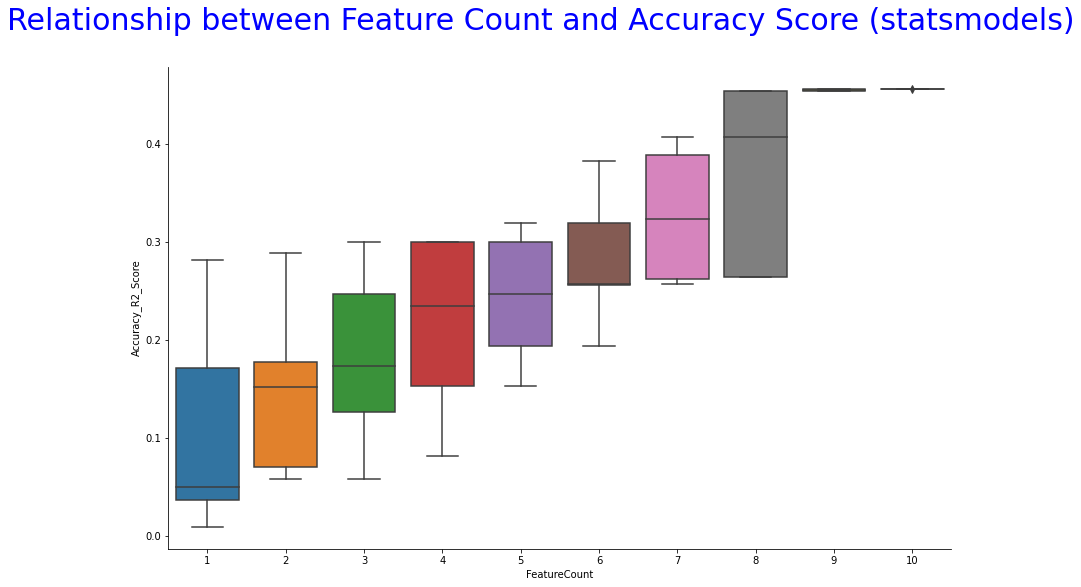

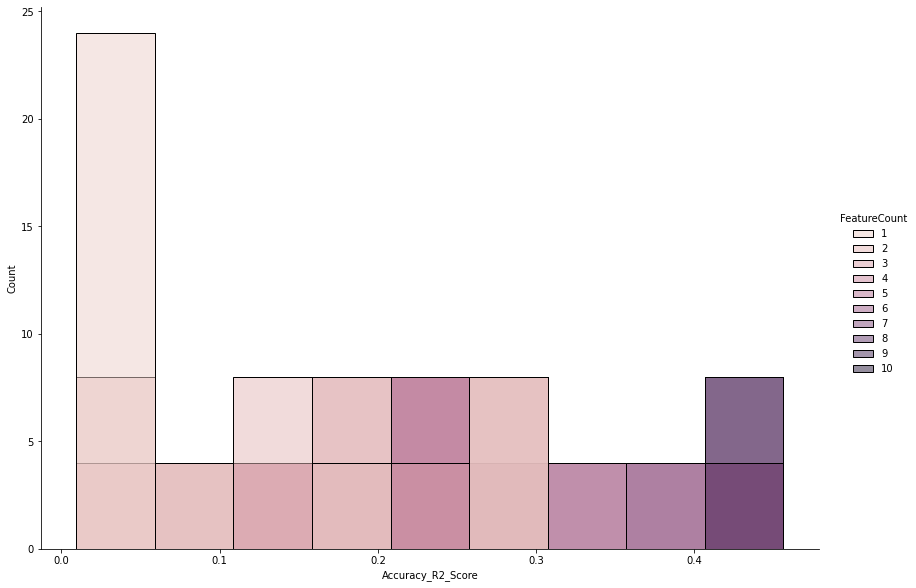

In [40]:
#Plotting the Relationship between Feature Count and Accuracy Score (statsmodels)
plt.figure(figsize = (10,8))
x = sns.catplot(data = results_dataframe_sm, kind='box',
           x = 'FeatureCount',
           y = 'Accuracy_R2_Score',
           height=8.27, 
            aspect=11.7/8.27)


x.fig.suptitle('Relationship between Feature Count and Accuracy Score (statsmodels)',
               fontsize=30, c='b')

x.fig.subplots_adjust(top=0.88)

y = sns.displot(data = results_dataframe_sm,x ='Accuracy_R2_Score',height=8.27, 
            aspect=11.7/8.27,hue='FeatureCount')

---
__Observation__

Similar to SKLearn library, the statsmodels lr models, also indicate that the optimum feature count range from 8 to 10. In OLS, GLS, WLS, the feature count and the accuracy score have ```positive progressive relationship```.

---

<Figure size 720x576 with 0 Axes>

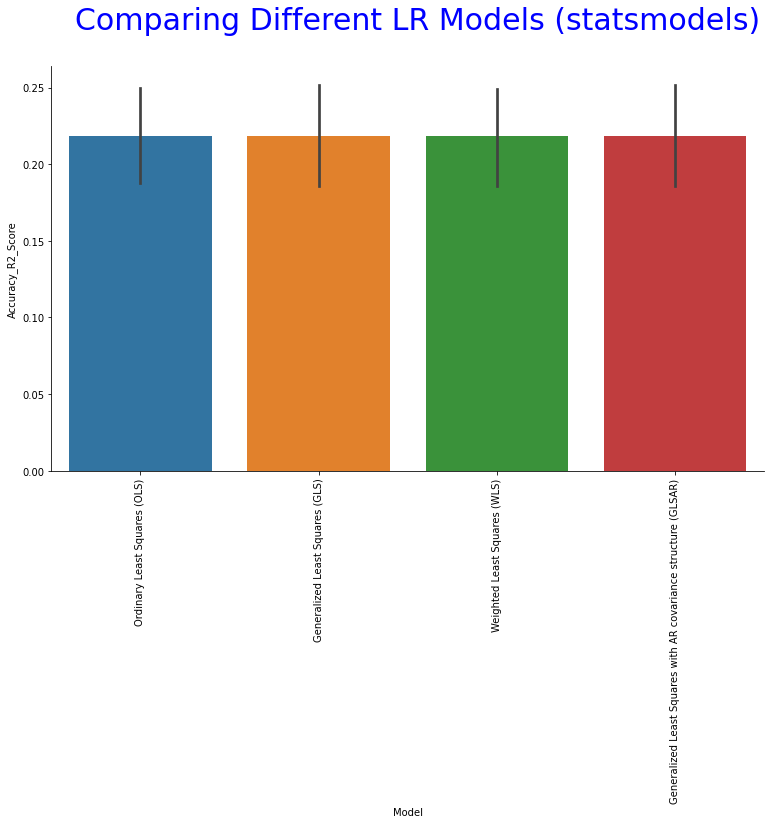

In [41]:
#Comparing Different LR Models (statsmodels)
plt.figure(figsize = (10,8))
x = sns.catplot(data = results_dataframe_sm, kind='bar',
           x = 'Model',
           y = 'Accuracy_R2_Score',
           height=8.27, 
            aspect=11.7/8.27)
x.fig.suptitle('Comparing Different LR Models (statsmodels)',
               fontsize=30, c='b')


x.fig.subplots_adjust(top=0.88)

plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90)
plt.show()

---
__Observation:__

_GLS,WLS,OLS,GlSAR all give the exact same accuracy score for a model._

---

<Figure size 720x576 with 0 Axes>

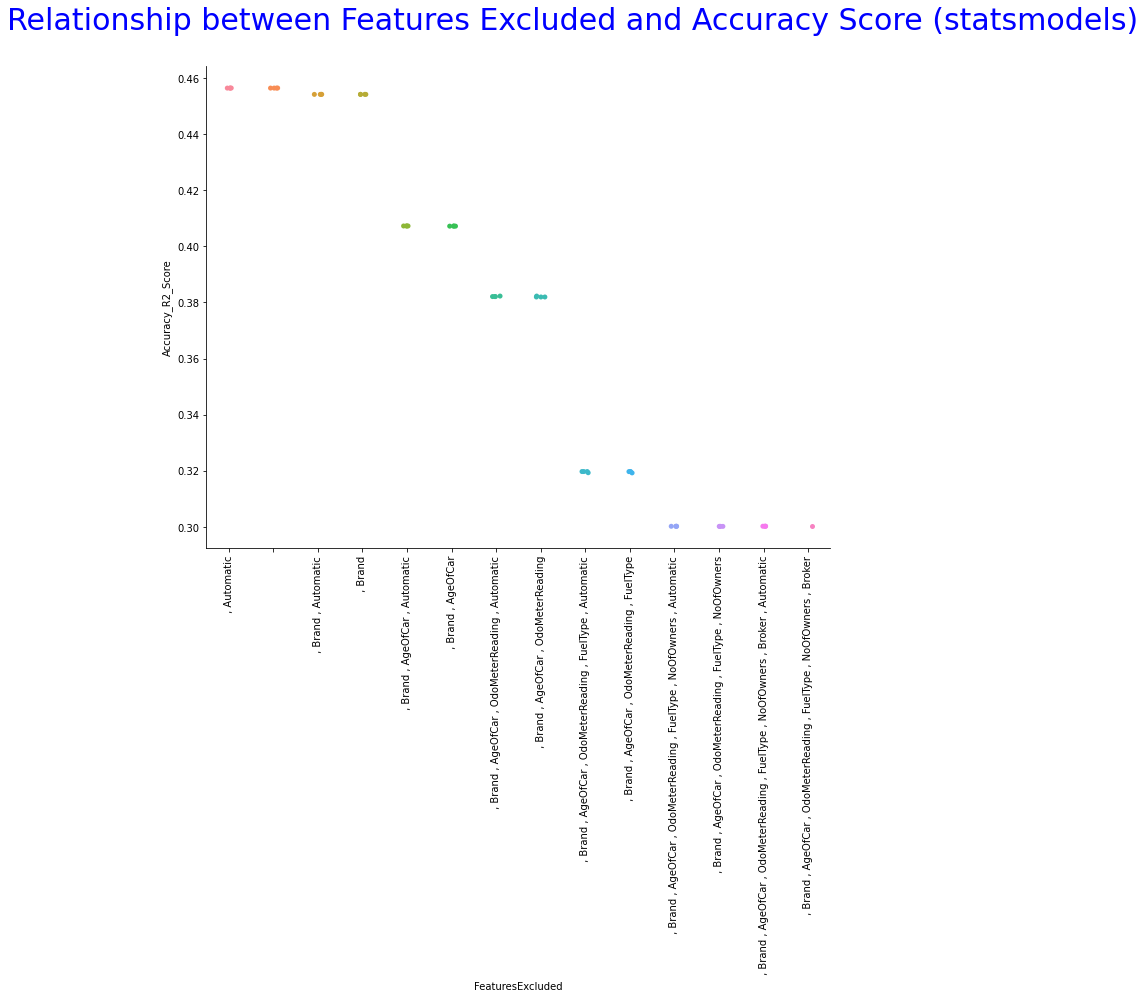

In [42]:
#Plotting the relationship between Features Excluded and Accuracy Score (stats)
plot_sm_df = results_dataframe_sm[results_dataframe_sm["Accuracy_R2_Score"]>0.3]

plt.figure(figsize = (10,8))
x = sns.catplot(data = plot_sm_df, x = 'FeaturesExcluded',y = 'Accuracy_R2_Score',
           height=8.27, 
            aspect=11.7/8.27)
x.fig.suptitle('Relationship between Features Excluded and Accuracy Score (statsmodels)',
               fontsize=30, c='b')


x.fig.subplots_adjust(top=0.88)

plt.xticks(rotation=90)
plt.show()

---
__Observation:__

Compared to SKLearn the features excluded in statsmodels lr, dont impact the accuracy score as much. But still similar to SKLEarn when 'Brand', 'Brand, Automatic' and 'Automatic' are excluded from the features for modelling, the accuracy is higher.

---

# Comparing SKLearn vs OLS Results

__Combining both the results datasets into one__

In [43]:
#Considering values from both resulting dataframes that have an accuracy above 0
df_sk = results_dataframe_sk[results_dataframe_sk["Accuracy_R2_Score"]>0]
df_sk.drop(['RandomState','TestingSize'],axis=1,inplace=True)

df_sm = results_dataframe_sm[results_dataframe_sm["Accuracy_R2_Score"]>0]

res_arr = [df_sk,df_sm]
res_df = pd.concat(res_arr)

res_df = res_df.reset_index(drop=True)
#res_df = res_df.set_index(['index'])

In [44]:
#Checking how the dataframe looks like
res_df.sample(5)

,Library,Model,Features,FeatureCount,FeaturesExcluded,Object,Accuracy_R2_Score
523,sci-kit learn,Simple Linear Regression,"[FuelType, NoOfOwners, Broker, Direct Owner, T...",6,", Brand , AgeOfCar , OdoMeterReading , Automatic",LinearRegression(),0.333212
1631,statsmodels,Ordinary Least Squares (OLS),"[OdoMeterReading, FuelType, NoOfOwners, Broker...",6,", Brand , AgeOfCar , Manual , Automatic",<statsmodels.regression.linear_model.Regressio...,0.194199
94,sci-kit learn,Simple Linear Regression,[Broker],1,", Brand , AgeOfCar , OdoMeterReading , FuelTy...",LinearRegression(),0.056326
190,sci-kit learn,Simple Linear Regression,[FuelType],1,", Brand , AgeOfCar , OdoMeterReading , NoOfOw...",LinearRegression(),0.065832
914,sci-kit learn,Simple Linear Regression,"[NoOfOwners, Broker, Direct Owner, Trustmark B...",6,", Brand , AgeOfCar , OdoMeterReading , FuelType",LinearRegression(),0.301841


---
__Method:__

- Merging statsmodels, sk-learn model results dataset using __```pd.concat()```__, while dropping additional hyperparameters of sklearn dataframe like _Testing Sixe_, _Random State_.

---

### Comparing LR Model Accuaracies of both libraries

In [45]:
#Sorting in Descending order according to Accuracy Score
res_df.sort_values(by=['Accuracy_R2_Score'],ascending=False).head(10)

,Library,Model,Features,FeatureCount,FeaturesExcluded,Object,Accuracy_R2_Score
390,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",LinearRegression(),0.492800
391,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,LinearRegression(),0.492800
399,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",8,", Brand , Automatic",LinearRegression(),0.490010
400,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",9,", Brand",LinearRegression(),0.490010
72,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",9,", Brand",LinearRegression(),0.486127
71,sci-kit learn,Simple Linear Regression,"[AgeOfCar, OdoMeterReading, FuelType, NoOfOwne...",8,", Brand , Automatic",LinearRegression(),0.486126
62,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",LinearRegression(),0.486102
63,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,LinearRegression(),0.486102
773,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",LinearRegression(),0.484285
774,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,LinearRegression(),0.484285


In [46]:
res_df[res_df["Accuracy_R2_Score"]==res_df[res_df["Library"]=="sci-kit learn"]["Accuracy_R2_Score"].max()]

,Library,Model,Features,FeatureCount,FeaturesExcluded,Object,Accuracy_R2_Score
390,sci-kit learn,Simple Linear Regression,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",9,", Automatic",LinearRegression(),0.4928


In [47]:
res_df[res_df["Accuracy_R2_Score"]==res_df[res_df["Library"]=="statsmodels"]["Accuracy_R2_Score"].max()]

,Library,Model,Features,FeatureCount,FeaturesExcluded,Object,Accuracy_R2_Score
1574,statsmodels,Generalized Least Squares with AR covariance s...,"[Brand, AgeOfCar, OdoMeterReading, FuelType, N...",10,,<statsmodels.regression.linear_model.Regressio...,0.456451


<Figure size 720x576 with 0 Axes>

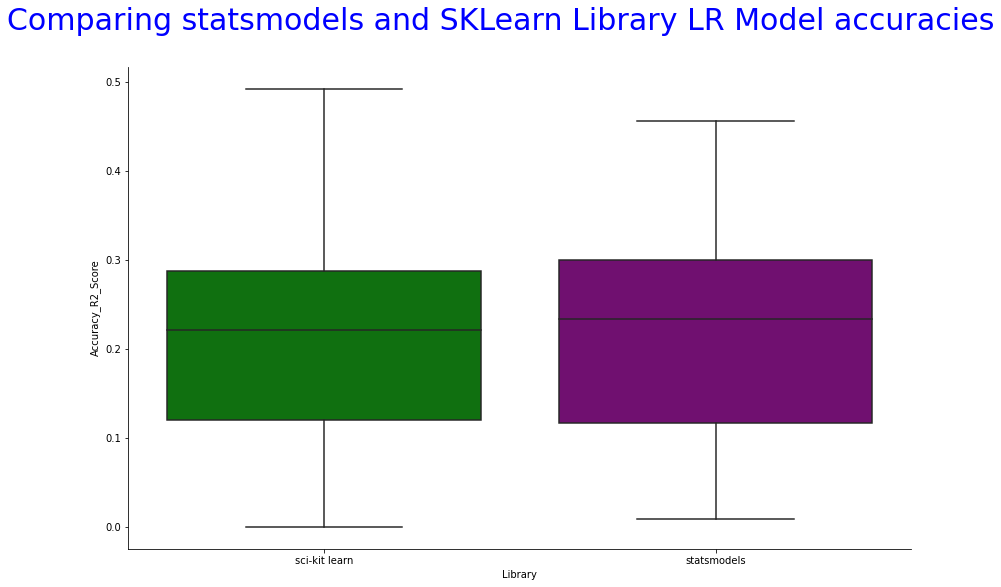

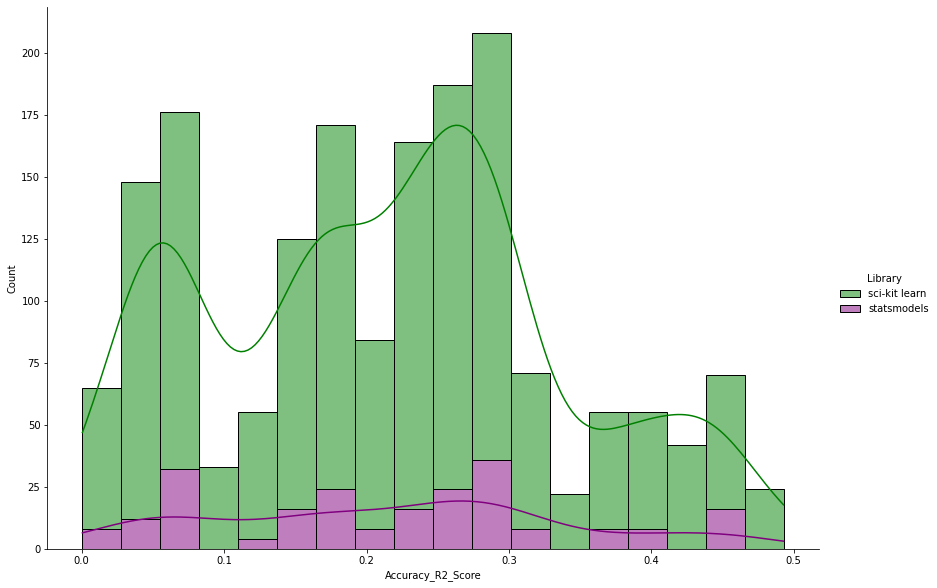

In [48]:
#Comparing statsmodels and SKLearn Library
plt.figure(figsize = (10,8))
x = sns.catplot(data = res_df, kind='box',
           x = 'Library',
           y = 'Accuracy_R2_Score',palette=["green", "purple"],
           height=8.27, 
            aspect=11.7/8.27)

x.fig.suptitle('Comparing statsmodels and SKLearn Library LR Model accuracies',
               fontsize=30, c='b')

x.fig.subplots_adjust(top=0.88)

y = sns.displot(data = res_df,x ='Accuracy_R2_Score',palette=["green", "purple"],height=8.27, 
            aspect=11.7/8.27,hue='Library',kde=True,multiple="stack")

---
__Observation:__

It can be seen that across the various model permuattions of both the libraries, statsmodels has a slightly better average accuracy in the models it generates. But, as there is _customisability in test splits and random state in sci-kit learn library_, __the top 10 highest accuracy models are all generated throught sci-kit simple linear regression.__

- All the models generated with an accuracy over 0.46 belong to sci-kit learn.
- Highest Accuracy:
    1. sci-kit learn: 0.49 (features considered = 9)
    2. statsmodels: 0.46 (features considered = 10)
 
This discrepency can be pinned down to two things, sci-kit learns's more offerings when it comes to ```hypertuning parameters```, and the fact that we weren't able to try other LR models provided by statsmodels library.
 
---

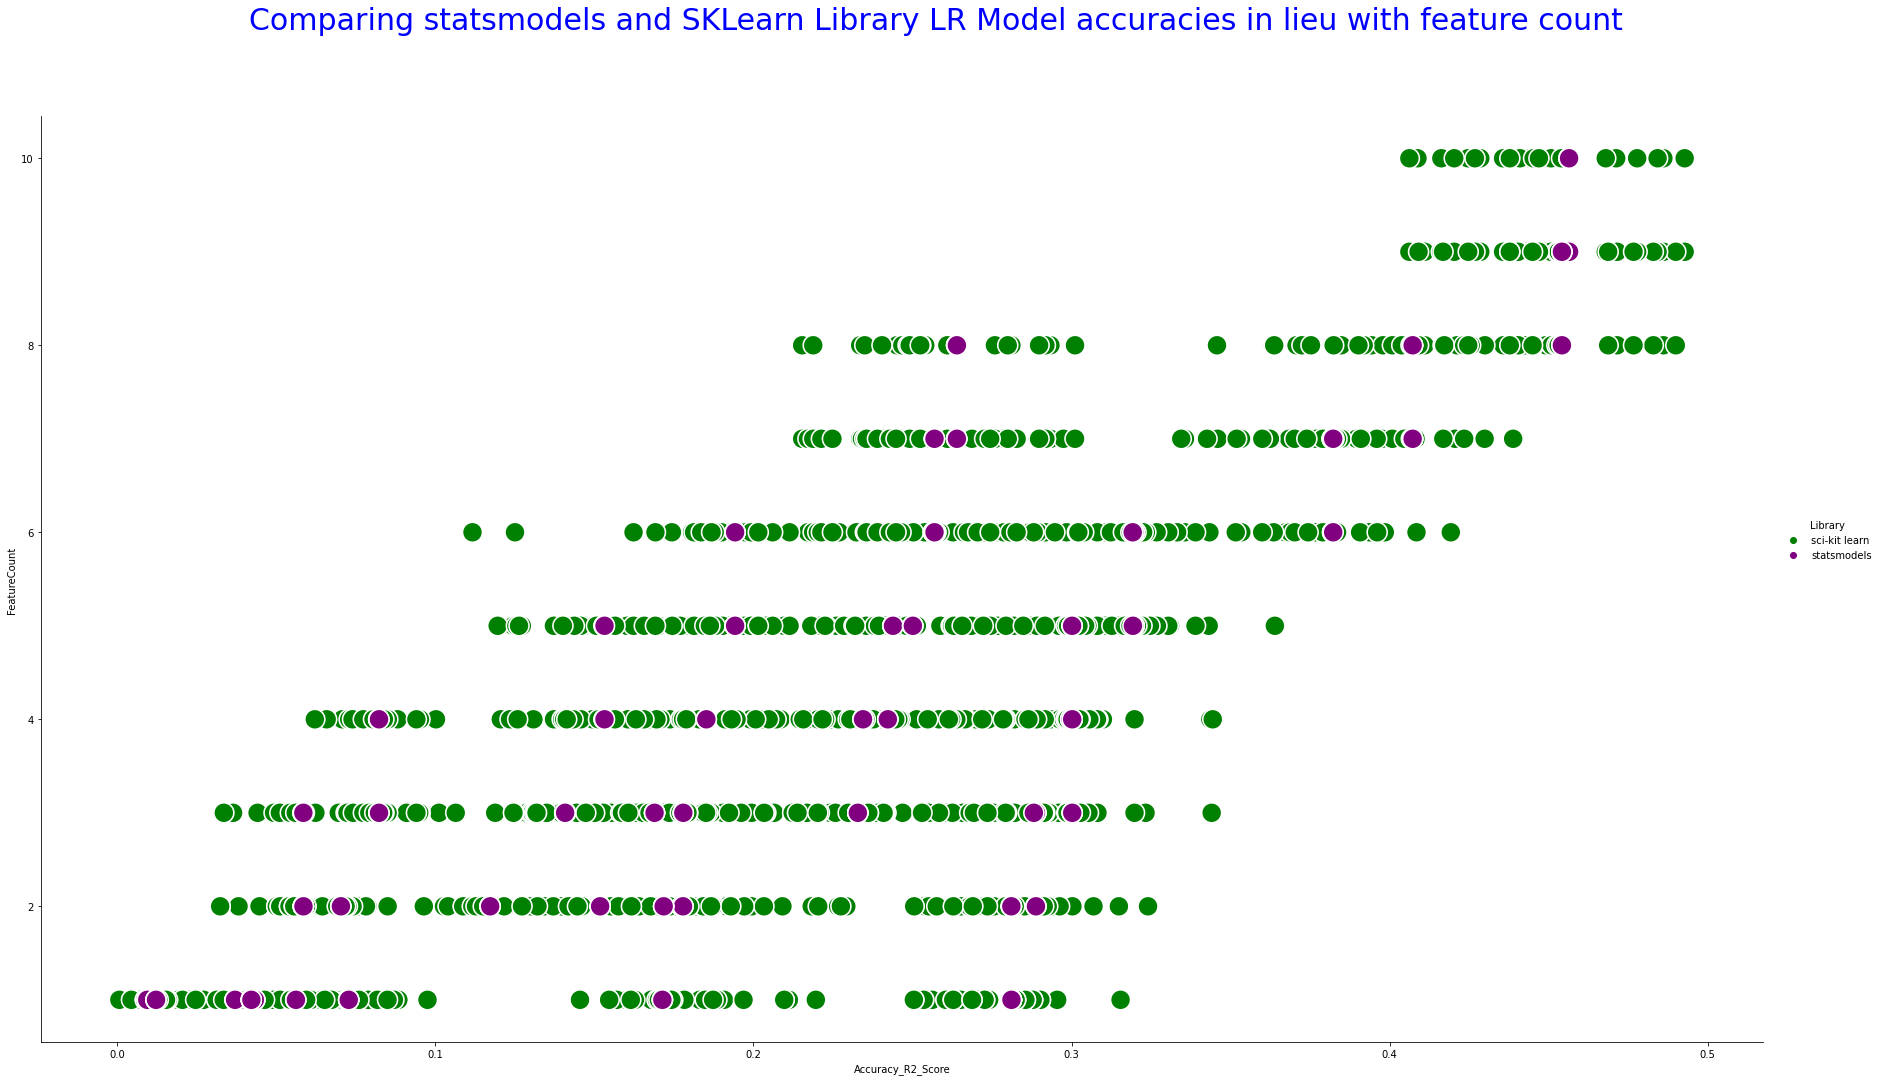

In [49]:
#Comparing statsmodels and SKLearn Library LR Model accuracies in lieu with feature count
x = sns.relplot(data = res_df,
           x = "Accuracy_R2_Score",
           y = "FeatureCount",
           hue = "Library",palette=["green", "purple"], s =400,
            height=15.27, 
            aspect=16.7/10.27)

x.fig.suptitle('Comparing statsmodels and SKLearn Library LR Model accuracies in lieu with feature count',
               fontsize=30, c='b')

x.fig.subplots_adjust(top=0.88)

---
__Observation:__

There is a linear relationship between the features considered and the accuracy of the models, irrespective of the library used. statsmodels data points, are more proportional, while sc-kit learn has more scattered data points. This is because, external factors like testing_size and random_state also affected the R2 score in sci-kit learn models.

---

# Picking the best model, and predicting !

---
### Model to be used


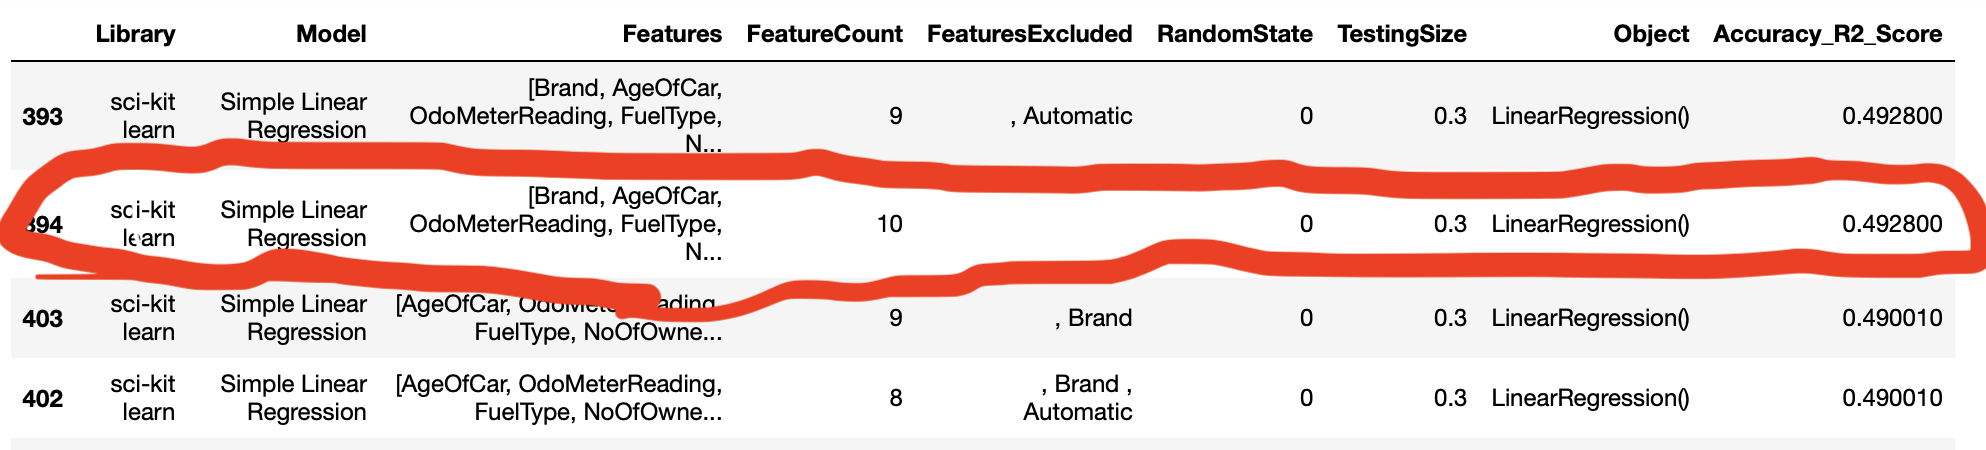

---

In [351]:
#Training, Testing Split
X = df[features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    test_size=0.3)
model_lr = LinearRegression() 
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
acc = r2_score(y_test, y_pred)
print("R Square Score (Model Accuracy): ", acc)

R Square Score (Model Accuracy):  0.4927997721607612


Text(0, 0.5, 'Price(Predicted)')

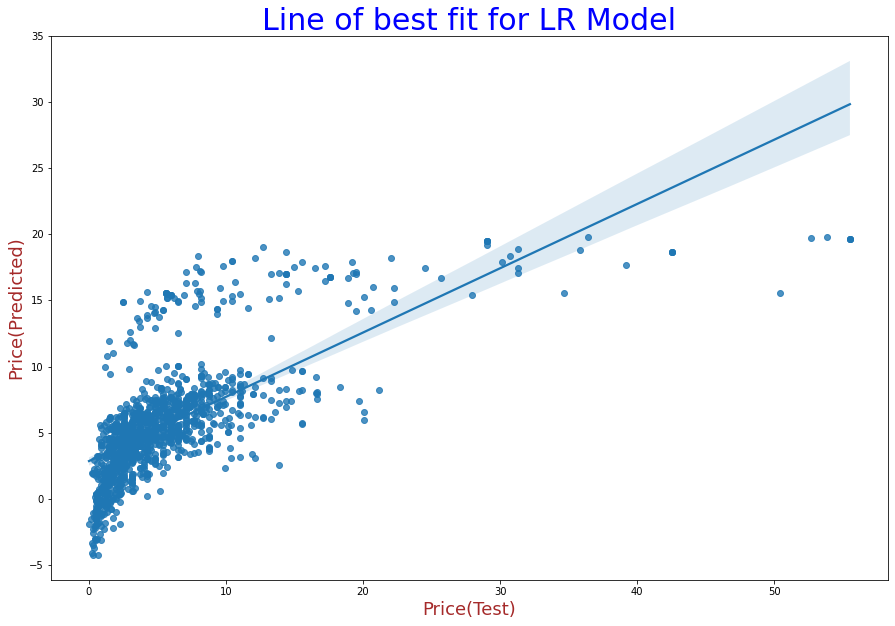

In [352]:
#Plotting the line of best fit for the selected model
plt.figure(figsize=(15,10))
x = sns.regplot(x=y_test, y= y_pred)
plt.title('Line of best fit for LR Model',
               fontsize=30, c='b')

plt.xlabel("Price(Test)",c='brown',fontsize=18)
plt.ylabel("Price(Predicted)",c='brown',fontsize=18)


### Basic Test Prediction

In [376]:
class color:
    HEADER = '\033[95m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    END = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [354]:
#Function to return the onehot encoded value of dealer type
def check_dealer(val):
    if val=='Broker':
        b = 1.0
        d = 0.0
        t = 0.0
        return b,d,t
        
    elif val=='Direct Owner':
        b = 0.0
        d = 1.0
        t = 0.0
        
        return b,d,t
    
    elif val=='Trustmark Broker':
        b = 0.0
        d = 0.0
        t = 1.0
        
        return b,d,t
    
#Function to return the onehot encoded value of fuel type
def check_gear(val):
    if val=='Manual':
        m = 1.0
        a = 0.0
        return m,a
        
    if val=='Automatic':
        m = 0.0
        a = 1.0
        return m,a

In [355]:
#Function to encode all values
def transform_values(input_variables):
    input_variables = user_input
    brand = le_brand.transform([input_variables['Brand']])[0]
    age = input_variables['AgeOfCar']
    dist = ss_odometer.transform([[input_variables['OdoMeterReading']]])[0][0]
    fuel = le_fuel.transform([input_variables['FuelType']])[0]
    owners = ore_owners.transform([[input_variables['NoOfOwners']]])[0][0]
    
    broker, direct_owner , trustmark_broker = check_dealer(input_variables['DealingType'])
    manual,automatic = check_gear(input_variables['GearSystem'])

    value_encoded = [brand,age,dist,fuel,owners,broker,direct_owner,trustmark_broker,manual,automatic]
    
    return value_encoded

In [367]:
#Function to return price
def predict_price(input_variables,model):

    predicted_price = model.predict([input_variables])[0]        
    predicted_price = mmx_price.inverse_transform([[predicted_price]])[0][0]
    
    
    return predicted_price

In [379]:
# Driver/Test Code

#User Input
print((color.BLUE+color.BOLD+"Car Price Predictor"+color.END).center(120,'-'))
print()
print(color.BOLD+"Car Brand: "+color.END,end=' ')
car_brand = input()
print(color.BOLD+"Car Age: "+color.END,end=' ')
car_age = int(input())
print(color.BOLD+"Car Odometer Reading (Distance Travelled): "+color.END,end=' ')
car_dist = float(input())
print(color.BOLD+"Car Fuel Type: "+color.END,end=' ')
car_fuelType = input()
print(color.BOLD+"Number Of Car Owners: "+color.END,end=' ')
car_numOwners = float(input())
print(color.BOLD+"Dealer Type: "+color.END,end=' ')
car_dealerType = input()
print(color.BOLD+"Car Gear System: "+color.END,end=' ')
car_gearSystem = input()
print()
print(100*'-')

#Converting the input variables into a dictionary
user_input = {"Brand" : car_brand, 
              "OdoMeterReading" : car_dist, 
             "FuelType" : car_fuelType, 
             "NoOfOwners" : car_numOwners,
              "GearSystem" : car_gearSystem,
              "DealingType" : car_dealerType, 
             "AgeOfCar" : car_age}

#Predicting the value
encoded_value = transform_values(user_input)
predicted_price = predict_price(encoded_value,model_lr)

print()
print(color.GREEN+color.BOLD+"Predicted Price (in rs. (aprox.)): "+color.END+color.BOLD,predicted_price,color.END)
print()
print(100*'-')

--------------------------------------------Car Price Predictor--------------------------------------------

Car Brand:  Ford
Car Age:  3
Car Odometer Reading (Distance Travelled):  40000
Car Fuel Type:  Petrol
Number Of Car Owners:  0
Dealer Type:  Direct Owner
Car Gear System:  Automatic

----------------------------------------------------------------------------------------------------

Predicted Price (in rs. (aprox.)):  704997.0365797245 

----------------------------------------------------------------------------------------------------


---
__Method:__

- For predicting the price based on user input I Created user-defined functions to encode the variables again and feed back to the model.


- The model i selected for predictions, considered all the features, had a training testing split of 70:30, and the random state as 0.

---